In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
from goexplore import *

In [4]:
import glob

In [20]:
env_id2archives = defaultdict(list)

In [21]:
for f in tqdm(glob.glob('/data/vision/phillipi/akumar01/exploration-generalization/atari/data/ge_specialist/*')):
    archive = np.load(f, allow_pickle=True).item()
    env_id = archive['config']['env_id']
    env_id2archives[env_id].append(archive)

  0%|          | 0/11200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
for env_id, archives in env_id2archives.items():
    print(env_id, len(archives))

BattleZone 63
Breakout 63
SpaceInvaders 69
StarGunner 63
KungFuMaster 67
Pitfall 68
Robotank 67
Phoenix 62
Tennis 63
Berzerk 62
Hero 69
Asteroids 67
Centipede 66
Defender 61
Amidar 67
BankHeist 62
Krull 66
Kangaroo 61
Gravitar 67
FishingDerby 61
Atlantis 67
WizardOfWor 66
MsPacman 63
MontezumaRevenge 61
Enduro 62
Bowling 66
VideoPinball 62
Jamesbond 66
Solaris 66
Qbert 67
IceHockey 66
PrivateEye 62
ChopperCommand 61
Assault 62
NameThisGame 67
Zaxxon 67
Surround 68
Riverraid 68
Freeway 66
BeamRider 68
Seaquest 68
Alien 68
Pong 66
Boxing 61
UpNDown 62
Frostbite 62
DoubleDunk 62
Asterix 66
TimePilot 67
YarsRevenge 66
RoadRunner 62
Tutankham 62
Venture 62
Gopher 66
CrazyClimber 68
DemonAttack 68


In [148]:
with open('atari_games_57.txt') as f:
    env_ids = f.read().split('\n')
def viz_all_env(plot_env_id):
    plt.figure(figsize=(20, 20))
    for i, env_id in enumerate(tqdm(env_ids)):
        plt.subplot(10, 6, i+1)
        plt.title(env_id)
        if env_id not in env_id2archives:
            continue
        plot_env_id(env_id, env_id2archives[env_id])
    plt.tight_layout()
    return plt.gcf()

In [68]:
env_id = 'Gopher'
archives = env_id2archives[env_id]
archive = archives[0]
traj, ret, novelty, is_leaf = archive['traj'], archive['ret'], archive['novelty'], archive['is_leaf']
print(is_leaf.sum()/len(is_leaf))

0.0487649063032368


In [69]:
traj_leaf = traj[is_leaf]
traj_sub = traj[~is_leaf]

In [70]:
for a in tqdm(traj_sub):
    assert any([np.array_equal(b[:len(a)], a) for b in traj_leaf])

  0%|          | 0/35736 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/57 [00:00<?, ?it/s]

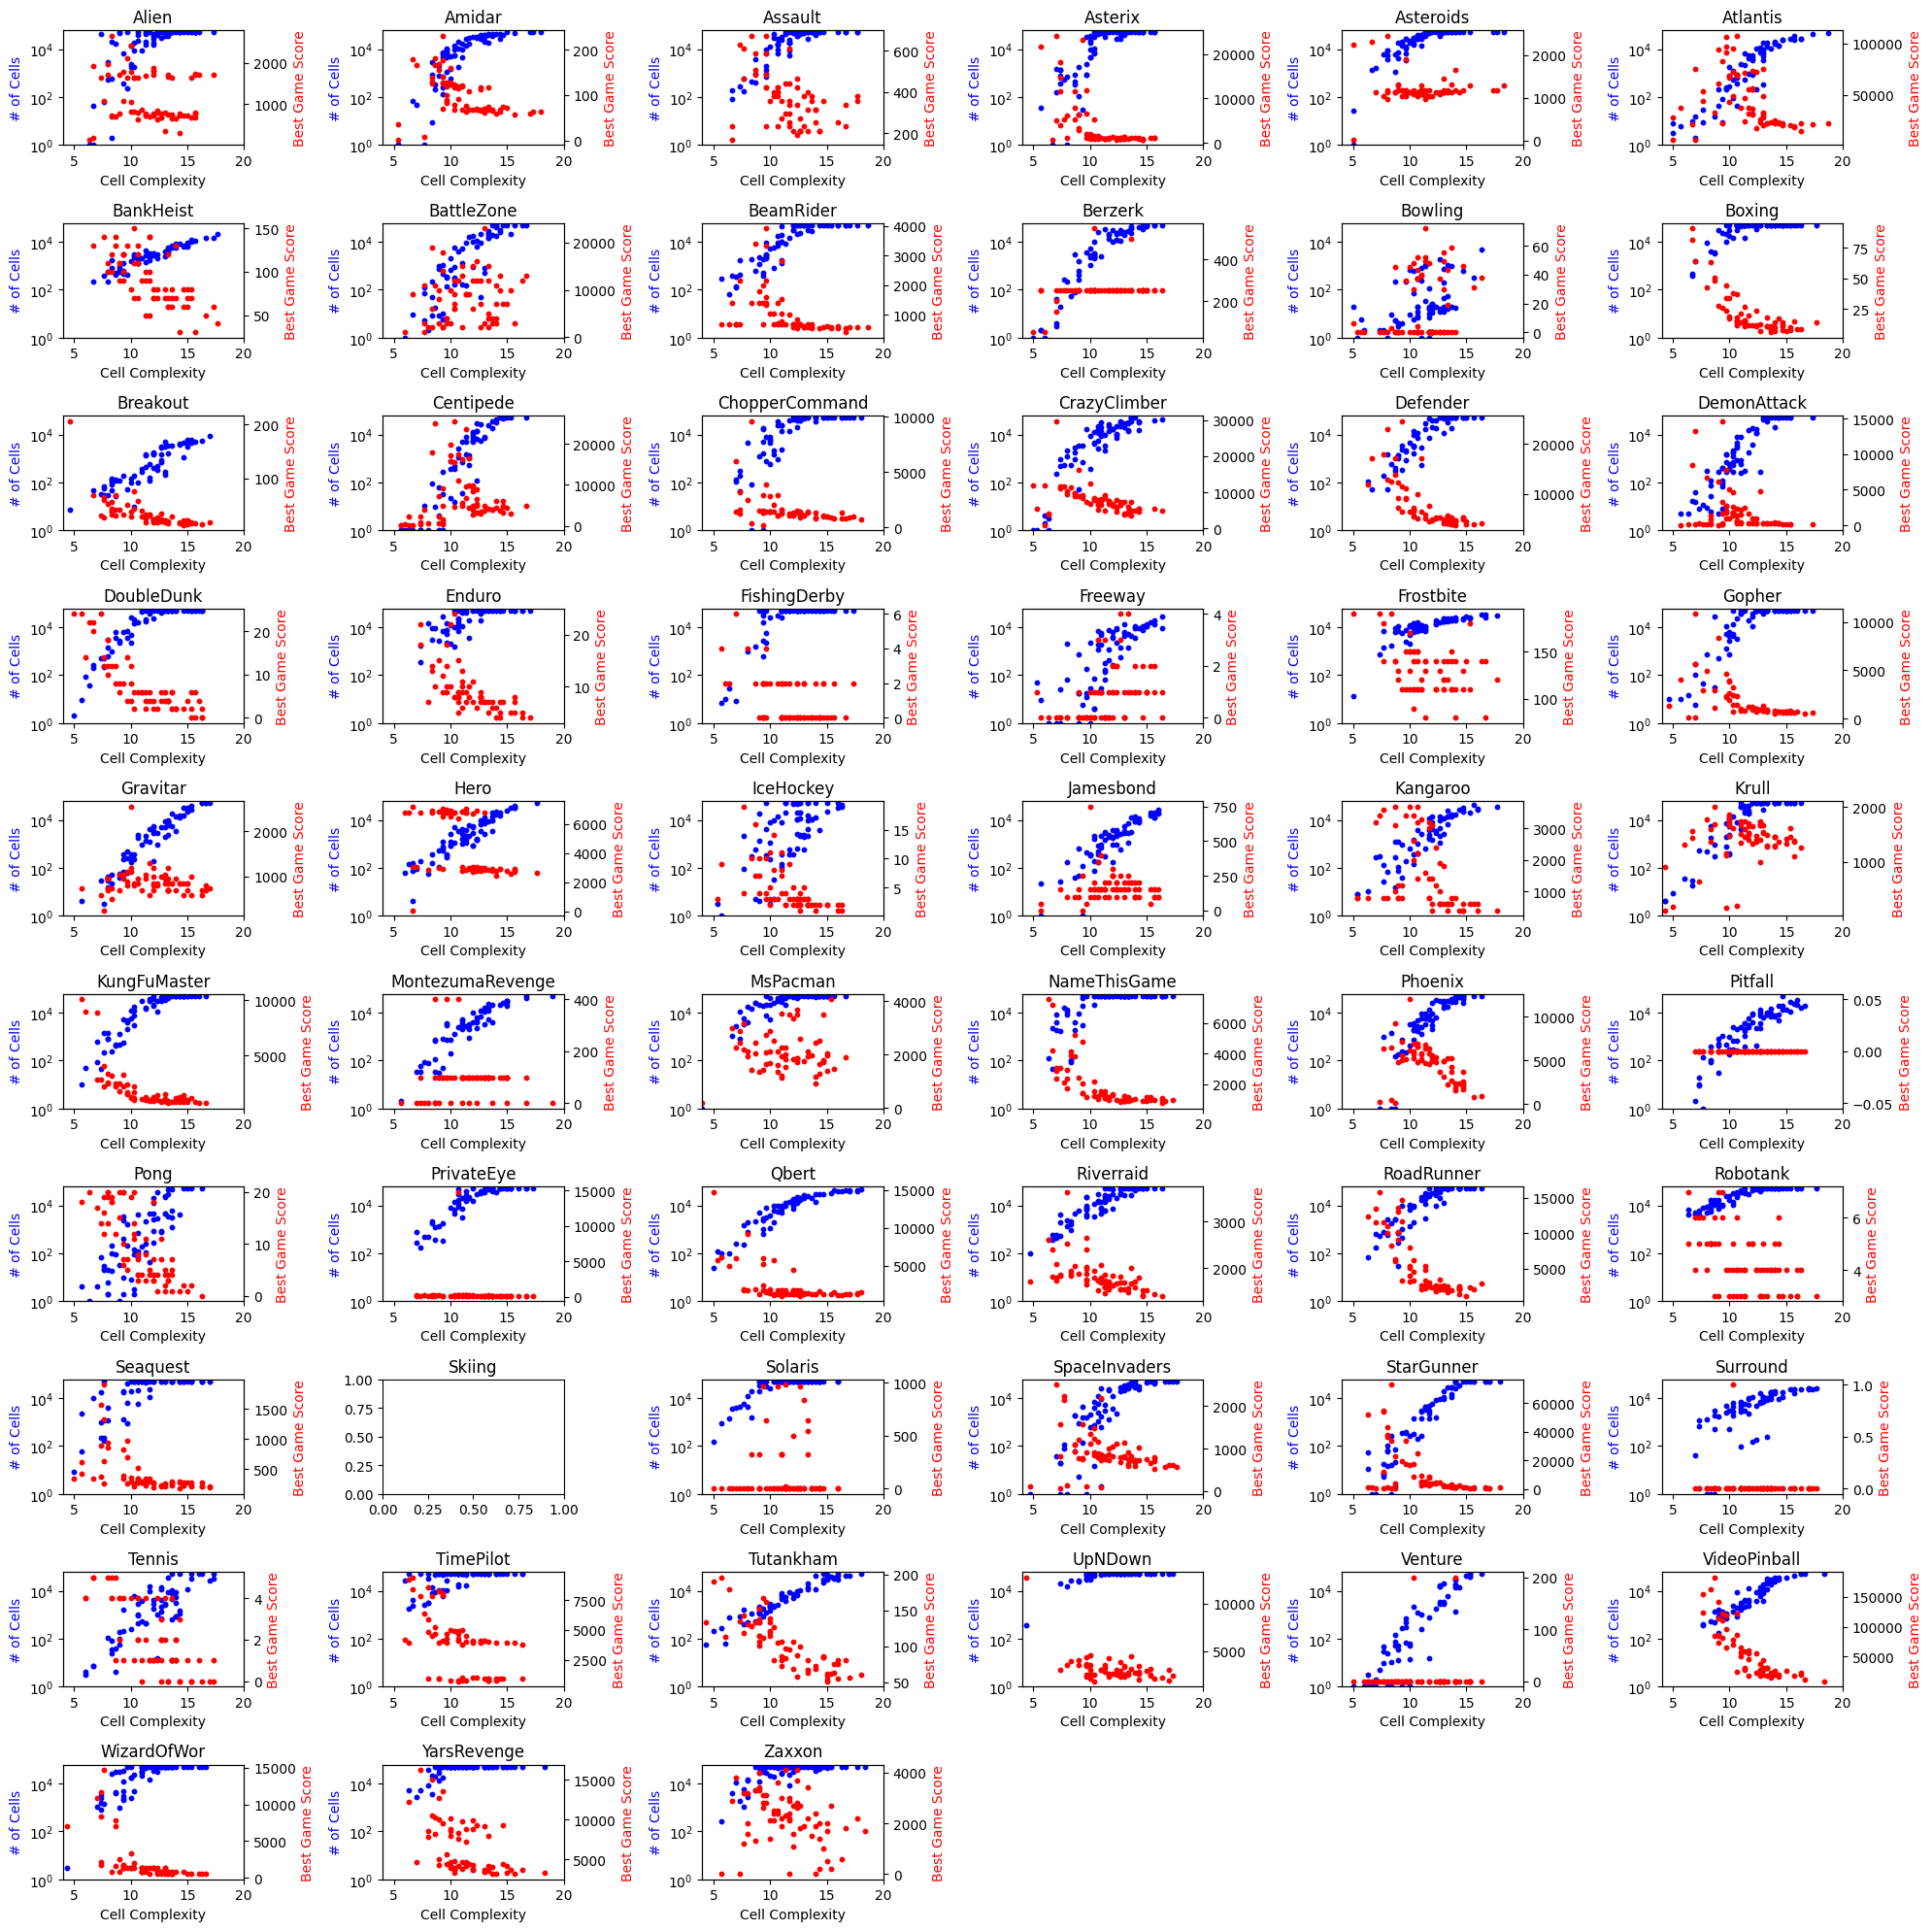

In [124]:
def plot_env_id(env_id, archives):
    n_cells, max_scores, complexity = [], [], []
    for archive in archives:
        n_cells.append(len(archive['traj']))
        max_scores.append(archive['ret'].max())
        complexity.append(archive['config']['h']+archive['config']['w']+archive['config']['d'])
    n_cells = np.array(n_cells)
    max_scores = np.array(max_scores)
    complexity = np.array(complexity)

    plt.scatter(complexity/3., n_cells, c='b', s=10.)
    # plt.axhline(y=15e3, c='b')
    plt.yscale('log')
    plt.ylabel('# of Cells', color='b')
    plt.xlabel('Cell Complexity')
    plt.ylim(1, 60000)
    plt.xlim(4, 20)
    
    plt.twinx()
    plt.scatter(complexity/3., max_scores, c='r', s=10.)
    plt.ylabel('Best Game Score', color='r')
    # plt.yscale('log')
    
viz_all_env(plot_env_id)
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

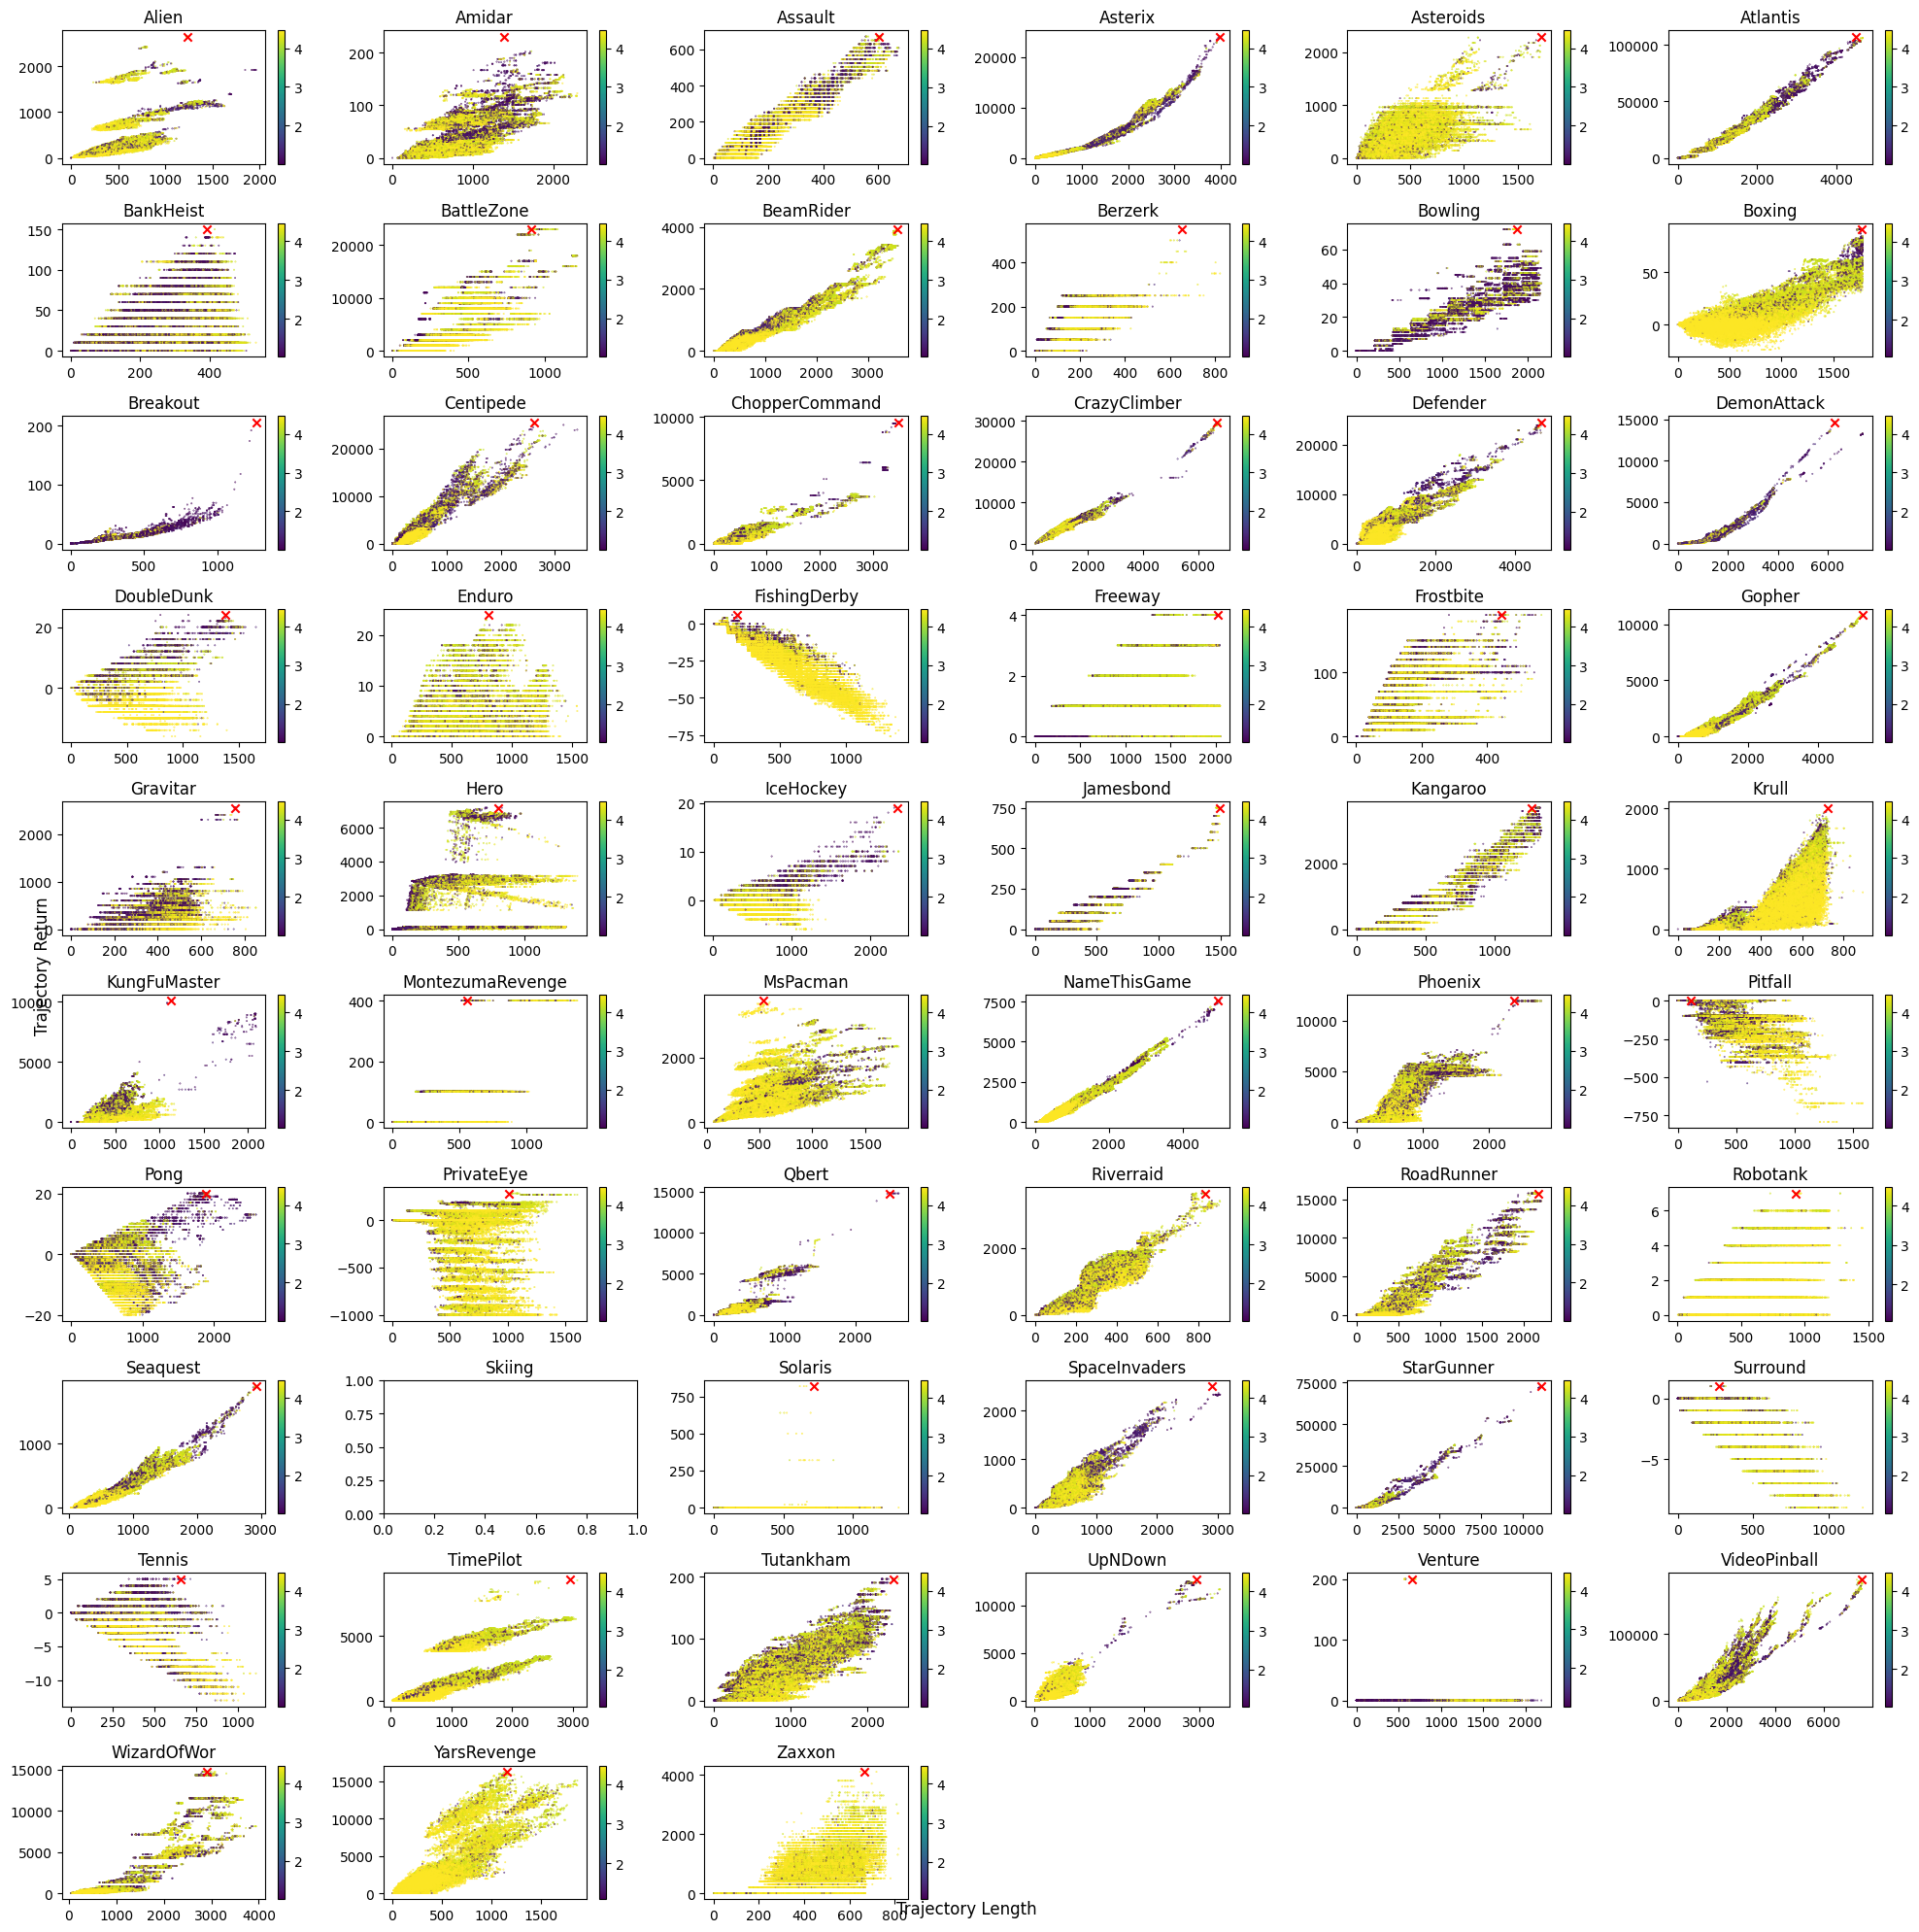

In [153]:
def plot_env_id(env_id, archives):
    tlens_all, rets_all, novs_all = [], [], []
    for archive in archives:
        trajs, rets, novs = archive['traj'], archive['ret'], archive['novelty']
        idx = np.random.permutation(len(trajs))[:100000//len(archives)]
        trajs, rets, novs = trajs[idx], rets[idx], novs[idx]
        tlens_all.extend([len(traj) for traj in trajs])
        rets_all.extend(rets)
        novs_all.extend(novs)

    plt.scatter(tlens_all, rets_all, s=.1, c=novs_all)
    plt.colorbar()
    plt.scatter(tlens_all[np.argmax(rets_all)], rets_all[np.argmax(rets_all)], marker='x', c='r')

viz_all_env(plot_env_id)
plt.gcf().supylabel('Trajectory Return')
plt.gcf().supxlabel('Trajectory Length')
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

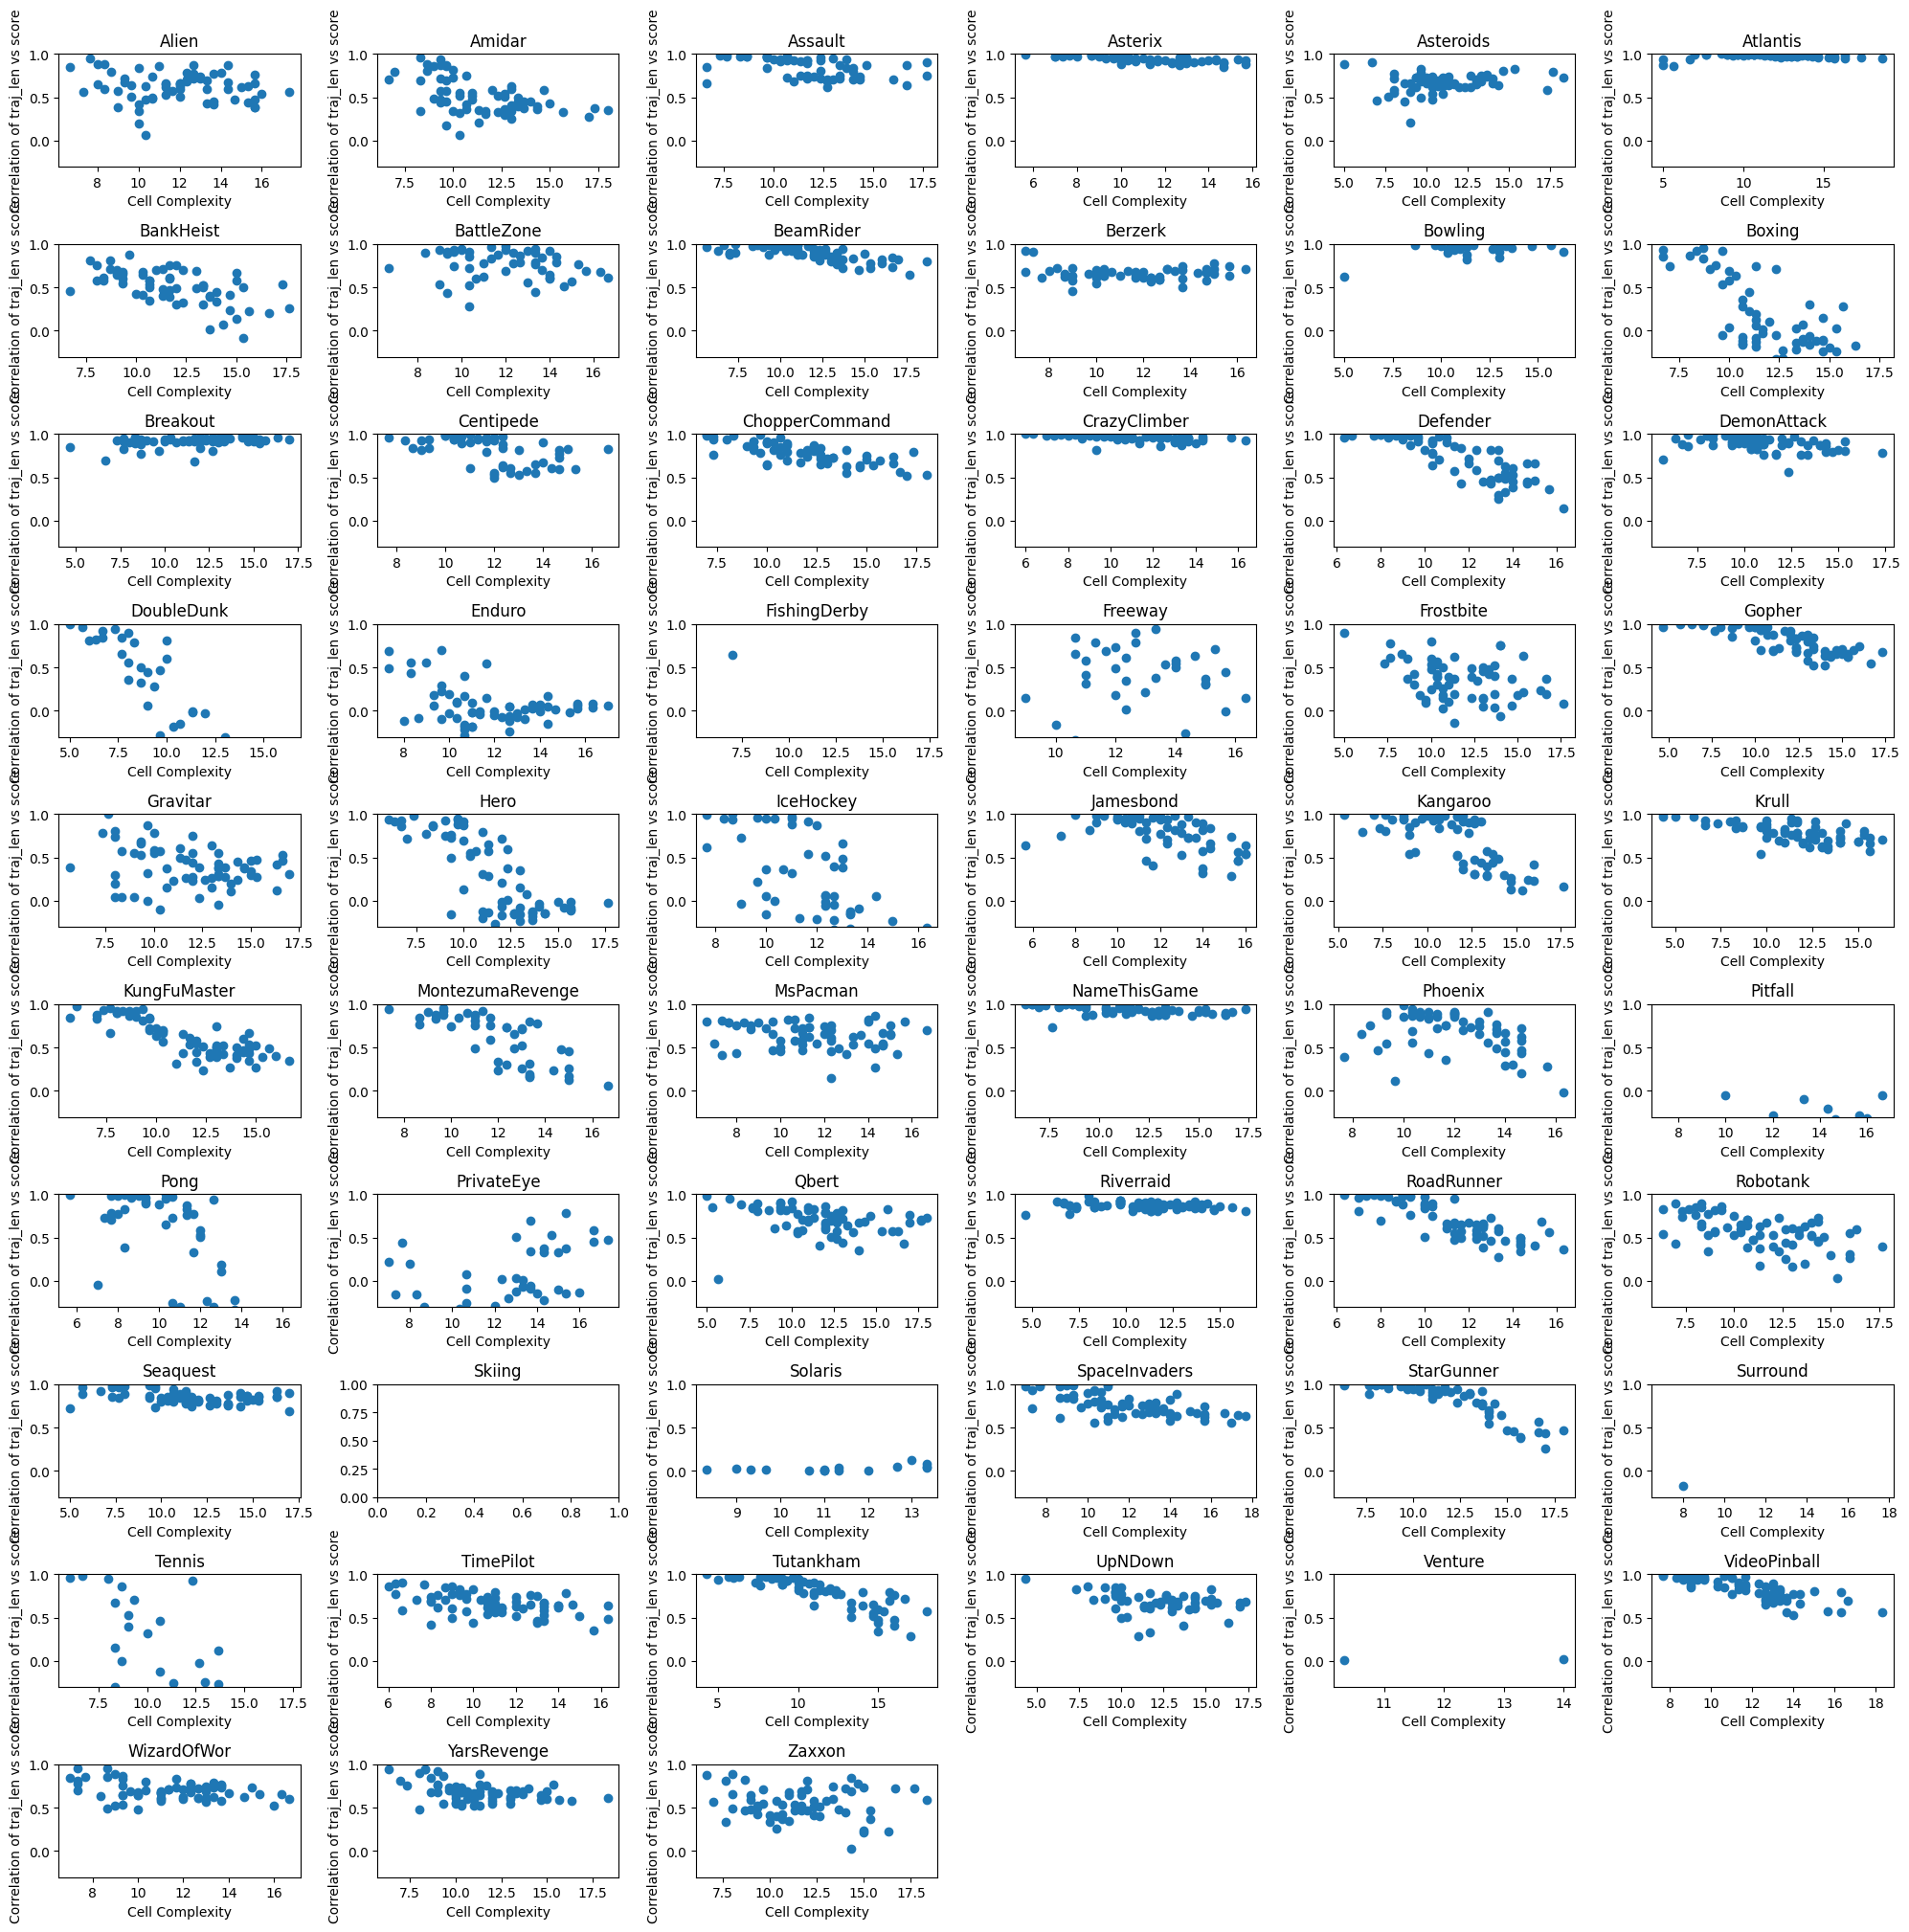

In [147]:
def plot_env_id(env_id, archives):    
    complexity, corrs = [], []
    for archive in archives:
        trajs, rets, novs = archive['traj'], archive['ret'], archive['novelty']
        tlens = [len(traj) for traj in trajs]
        corr = np.corrcoef(x=tlens, y=rets)[0, 1]
        corrs.append(corr)
        complexity.append(archive['config']['h']+archive['config']['w']+archive['config']['d'])
    complexity, corrs = np.array(complexity), np.array(corrs)
    
    plt.scatter(complexity/3., corrs)
    plt.ylabel('Correlation of traj_len vs score')
    plt.xlabel('Cell Complexity')
    plt.ylim(-0.3, 1)
    
viz_all_env(plot_env_id)
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

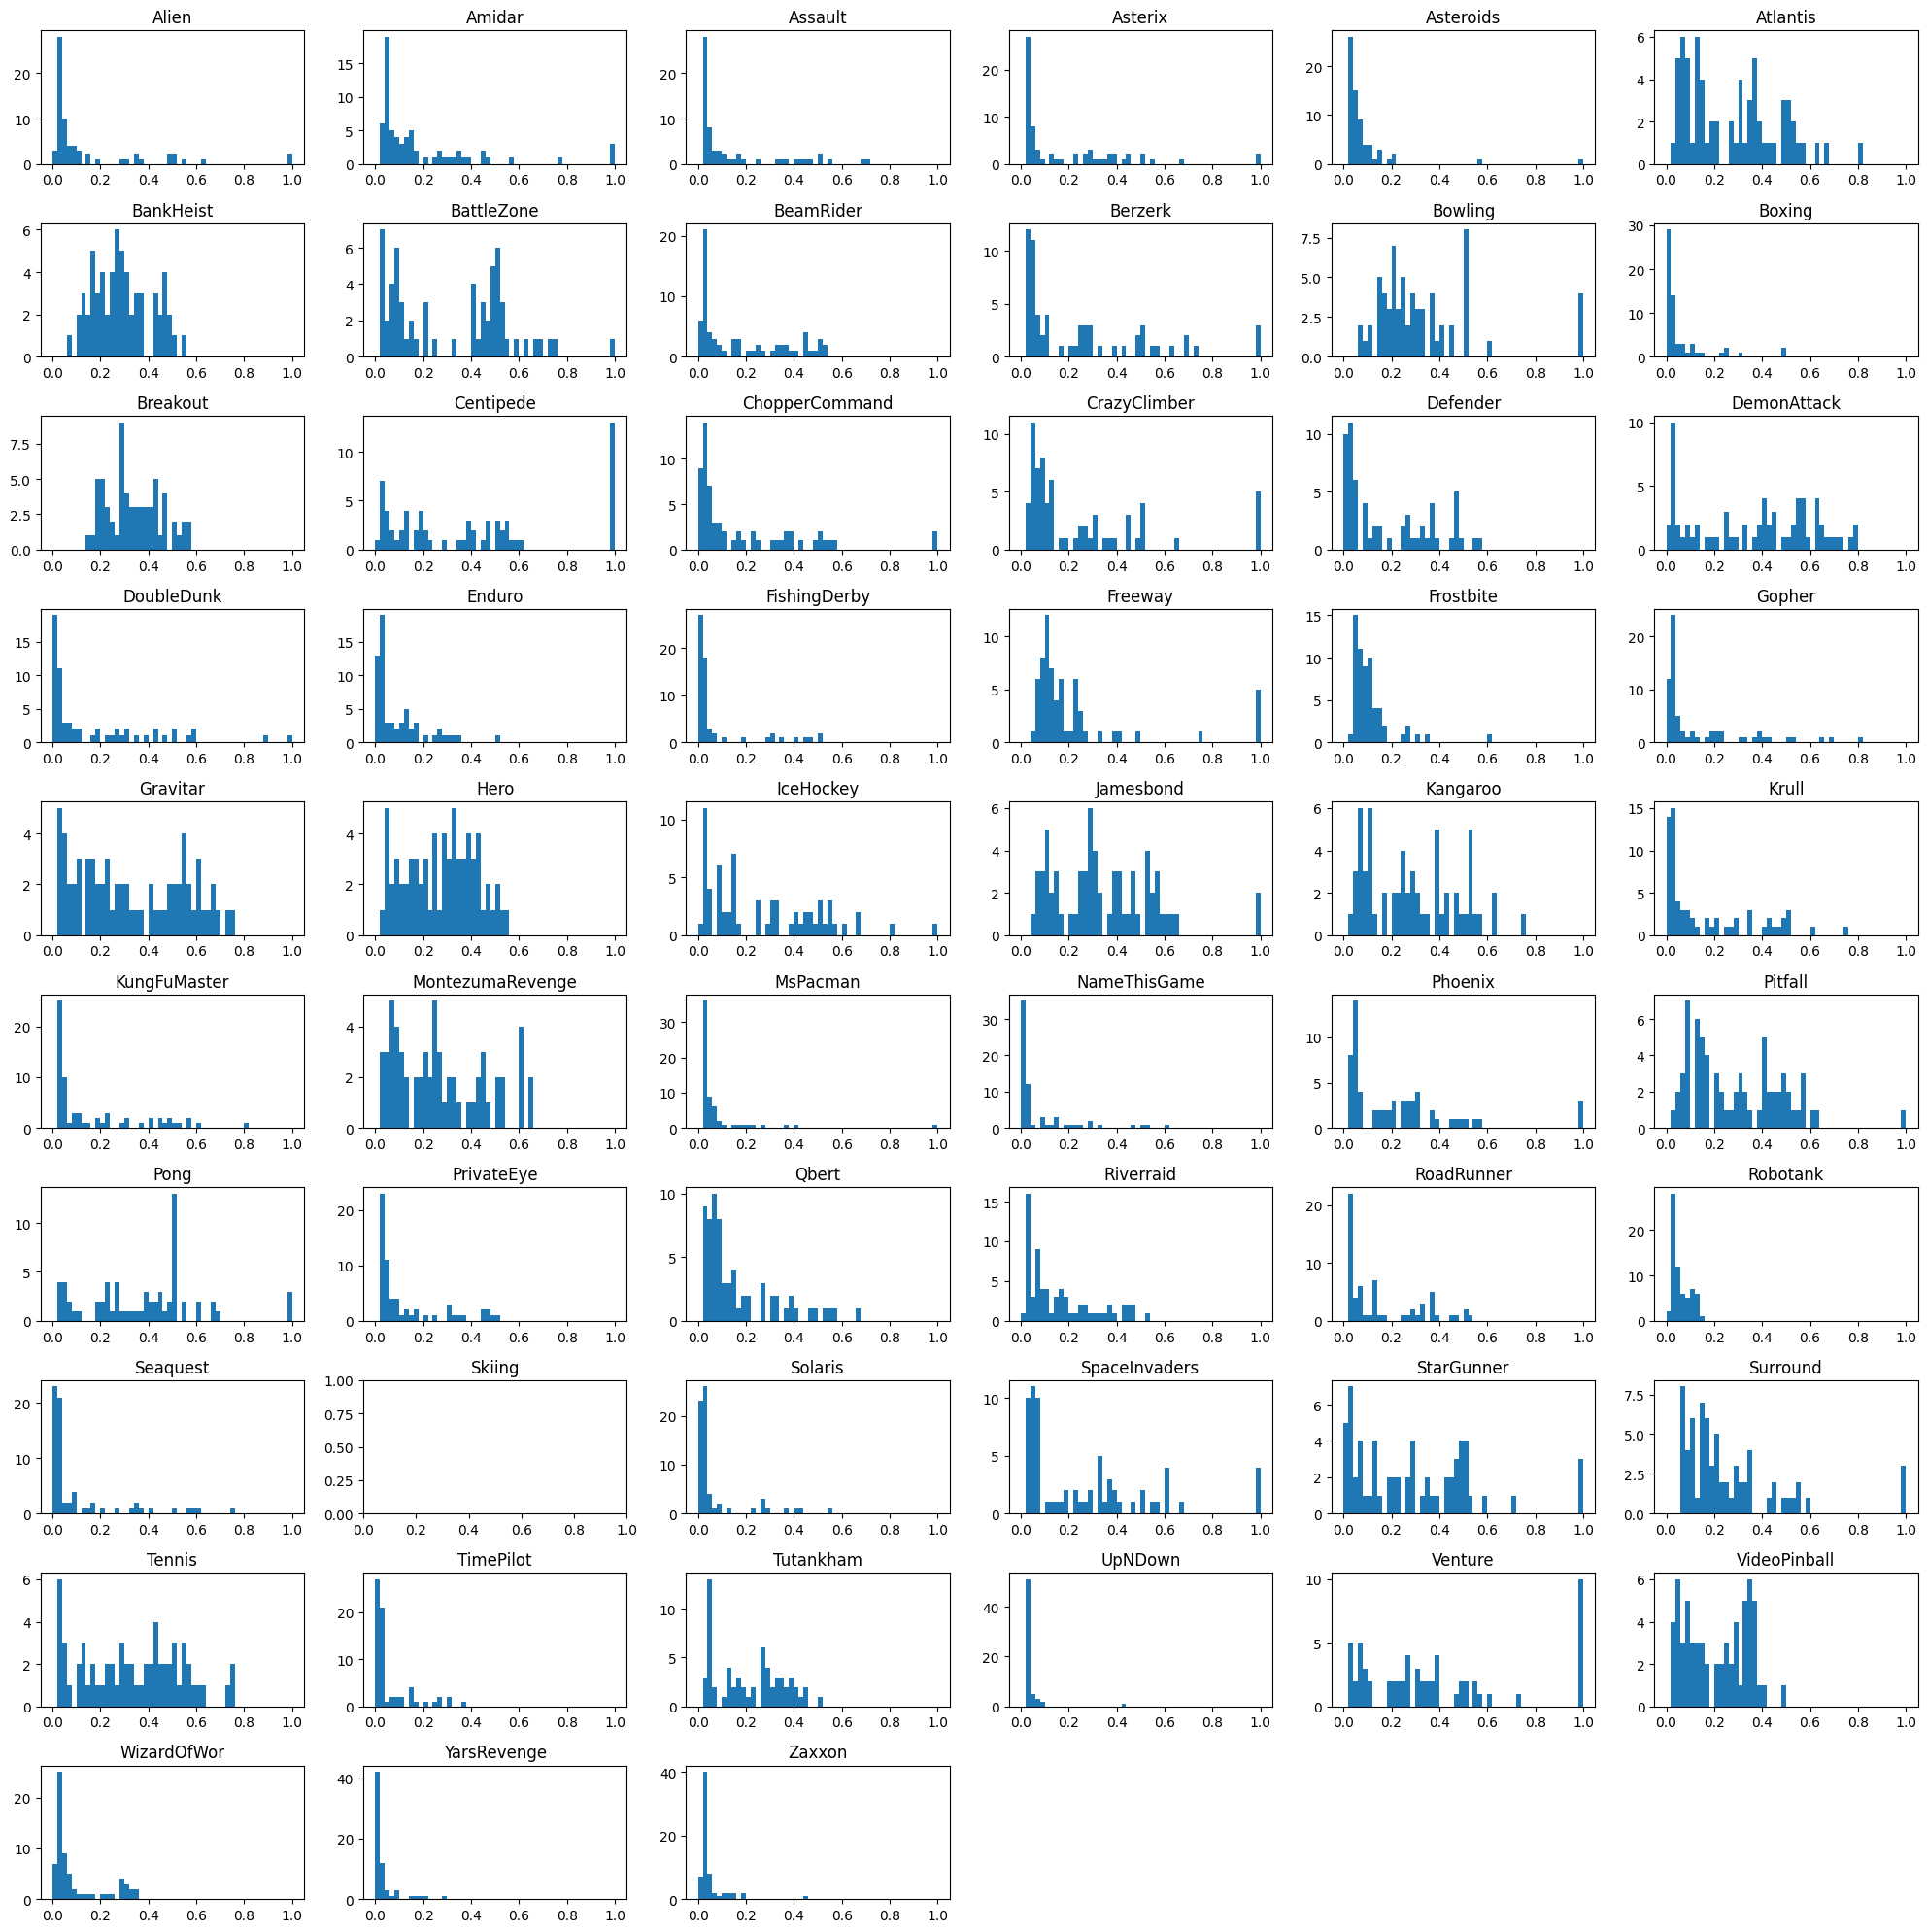

In [163]:
def plot_env_id(env_id, archives):
    percentages = []
    for archive in archives:
        is_leaf = archive['is_leaf']
        percentages.append(is_leaf.sum()/len(is_leaf))
    plt.hist(percentages, range=(0, 1), bins=50)
    # plt.x
    
viz_all_env(plot_env_id)
plt.show()